## Amazon Product Sentiment Analysis Introduction

In this project, I examine sentiment analysis on Amazon product reviews using both balanced and sample datasets to explore how sentiment classification varies across data conditions. The balanced dataset contains an equal number of positive, neutral, and negative reviews, allowing me to compare the models' accuracy across all sentiment types without bias. The sample dataset represents real-world distributions with a predominance of positive reviews, providing insights into model performance under naturally imbalanced conditions.<br><br>

 By comparing these models across balanced and sample datasets, I assess their strengths and limitations in handling skewed data distributions, especially in differentiating between neutral and polarized sentiments.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Reviews.csv', on_bad_lines='skip')

In [3]:
df.shape

(568454, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


There are 74258 unique products in this dataset

In [5]:
df['ProductId'].nunique()

74258

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df = df.drop(columns=['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
                      'HelpfulnessDenominator', 'Time', 'Summary'])

In [8]:
df['TrueLabel'] = 'neutral'

df.loc[df['Score'].isin([1, 2]), 'TrueLabel'] = 'negative'

df.loc[df['Score'].isin([4, 5]), 'TrueLabel'] = 'positive'

In [9]:
df.head()

,Id,Score,Text,TrueLabel
0,1,5,I have bought several of the Vitality canned d...,positive
1,2,1,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,4,This is a confection that has been around a fe...,positive
3,4,2,If you are looking for the secret ingredient i...,negative
4,5,5,Great taffy at a great price. There was a wid...,positive


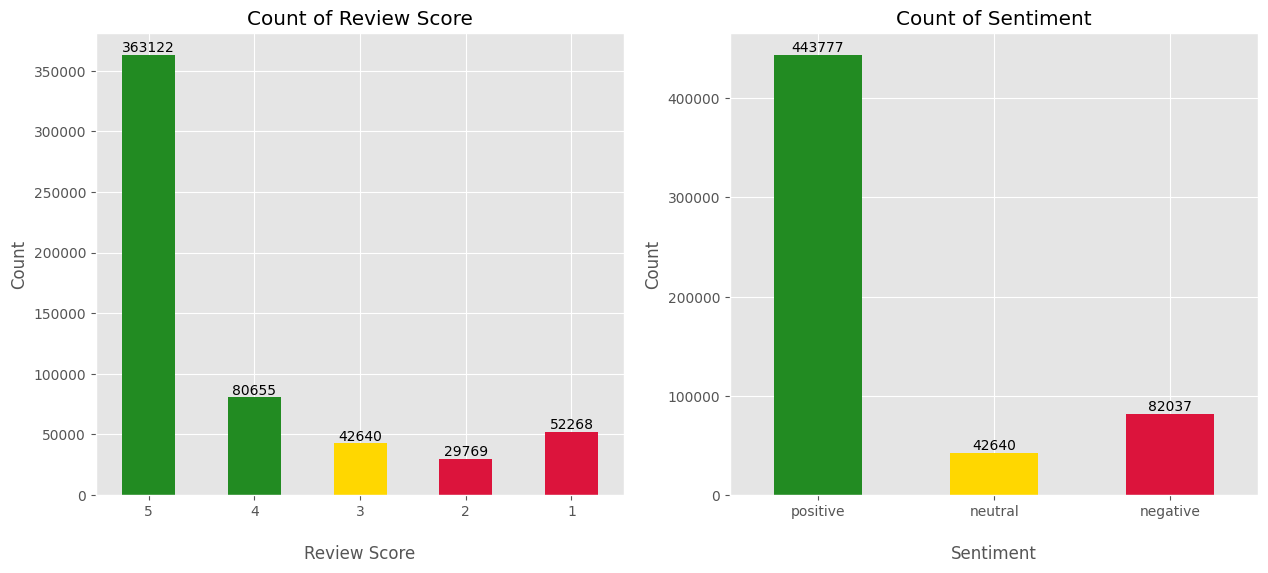

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

color_0 = ['forestgreen', 'forestgreen', 'gold', 'crimson', 'crimson']

barplot_0 = df['Score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=ax[0], color=color_0, rot=0)

for bar in barplot_0.patches:
    bar_height = bar.get_height()
    barplot_0.text(bar.get_x() + bar.get_width()/2, bar_height,
                  str(int(bar_height)),
                  ha='center', va='bottom')

ax[0].set_xlabel('\nReview Score')
ax[0].set_ylabel('Count')
ax[0].set_title('Count of Review Score')

color_1 = ['forestgreen', 'gold', 'crimson']

barplot_1 = df['TrueLabel'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=ax[1], color=color_1, rot=0)

for bar in barplot_1.patches:
    bar_height = bar.get_height()
    barplot_1.text(bar.get_x() + bar.get_width()/2, bar_height,
                  str(int(bar_height)),
                  ha='center', va='bottom')
ax[1].set_xlabel('\nSentiment')
ax[1].set_ylabel('Count')
ax[1].set_title('Count of Sentiment')

plt.show()

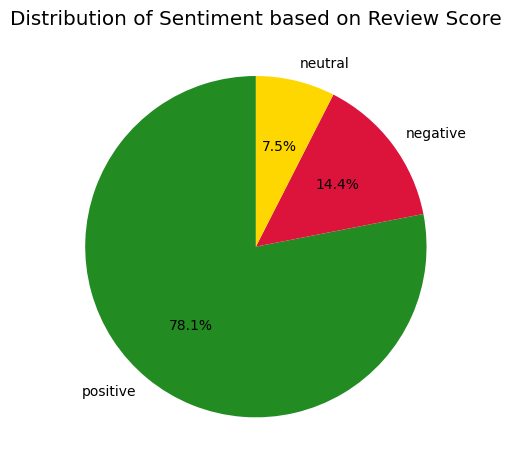

In [ ]:
labels = ['positive', 'negative', 'neutral']
colors = ['forestgreen', 'crimson', 'gold']

plt.pie(x=df['TrueLabel'].value_counts(), startangle=90, labels=labels, autopct='%1.1f%%', colors=colors)

plt.title('Distribution of Sentiment based on Review Score')
plt.tight_layout()
plt.show()

The reviews with greater than 512 tokens are removed from the original dataset using the `filter_tokens` function defined below. This is because RoBERTA pretrained models can only handle a maximum of 512 tokens.

In [ ]:
def filter_tokens(df, text_column, model_name='cardiffnlp/twitter-roberta-base-sentiment', token_limit=512):

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    def token_count(text):
        tokens = tokenizer.encode(text, add_special_tokens=True)  # Add special tokens for the model
        return len(tokens)

    df['token_count'] = df[text_column].apply(token_count)
    filtered_df = df[df['token_count'] <= token_limit]

    filtered_df = filtered_df.drop(columns=['token_count'])

    return filtered_df

In [ ]:
filtered_df = filter_tokens(df, 'Text')

In [ ]:
df.shape[0] - filtered_df.shape[0]

6005

In [ ]:
filtered_df.to_csv('reviews_filtered.csv', index=False)

In [46]:
df1 = filtered_df[filtered_df['Score']==1].sample(250, random_state=42)
df2 = filtered_df[filtered_df['Score']==2].sample(250, random_state=42)
df3 = filtered_df[filtered_df['Score']==3].sample(500, random_state=42)
df4 = filtered_df[filtered_df['Score']==4].sample(250, random_state=42)
df5 = filtered_df[filtered_df['Score']==5].sample(250, random_state=42)

df_balance = pd.concat([df1, df2, df3, df4, df5])

In [45]:
df_sample = filtered_df.sample(1500, random_state=42)

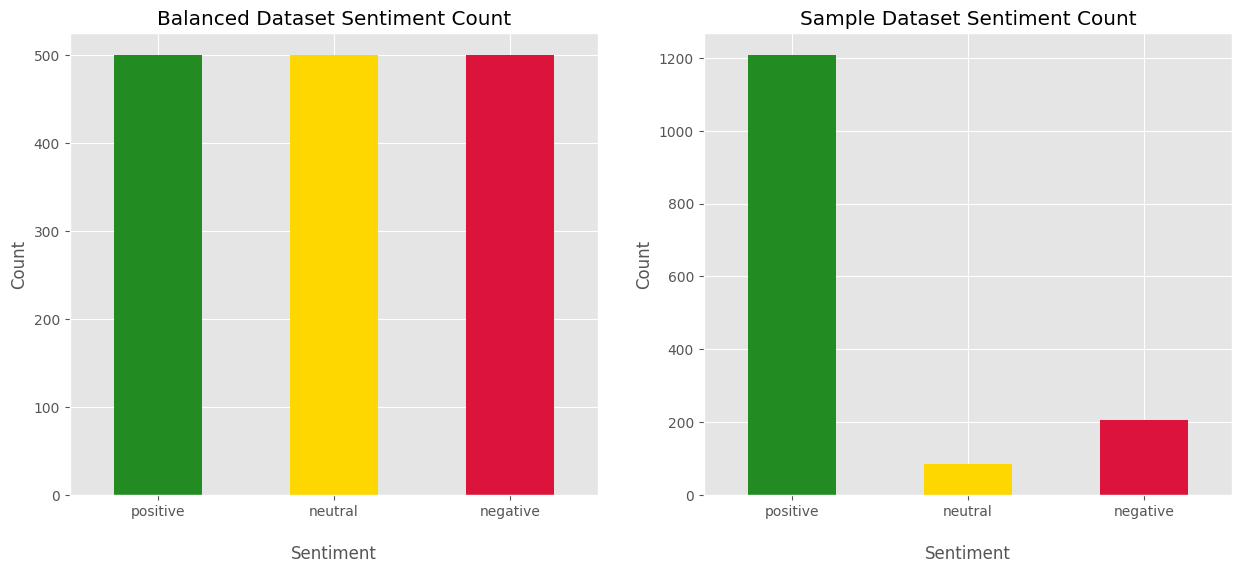

In [68]:
color=['forestgreen', 'gold', 'crimson']

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

df_balance['TrueLabel'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=ax[0], color=color, rot=0)

ax[0].set_xlabel('\nSentiment')
ax[0].set_ylabel('Count')
ax[0].set_title('Balanced Dataset Sentiment Count')

df_sample['TrueLabel'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=ax[1], color=color, rot=0)

ax[1].set_xlabel('\nSentiment')
ax[1].set_ylabel('Count')
ax[1].set_title('Sample Dataset Sentiment Count')

plt.show()

In [ ]:
df_balance.to_csv('reviews_balance.csv', index=False)
df_sample.to_csv('reviews_sample.csv', index=False)